Edward Anuichi (#8136037)

Introduction 

The task at hand is to find the likelihood of an individual with various qualities to get a stroke. 

The dataset being used is owned by fedesoriano. The source of the dataset can be found at: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

The dataset covers 5110 unique individuals with various statistics including their gender, age, various diseases, and smoking status.


Part 1 - Data cleaning and exploratory data analysis

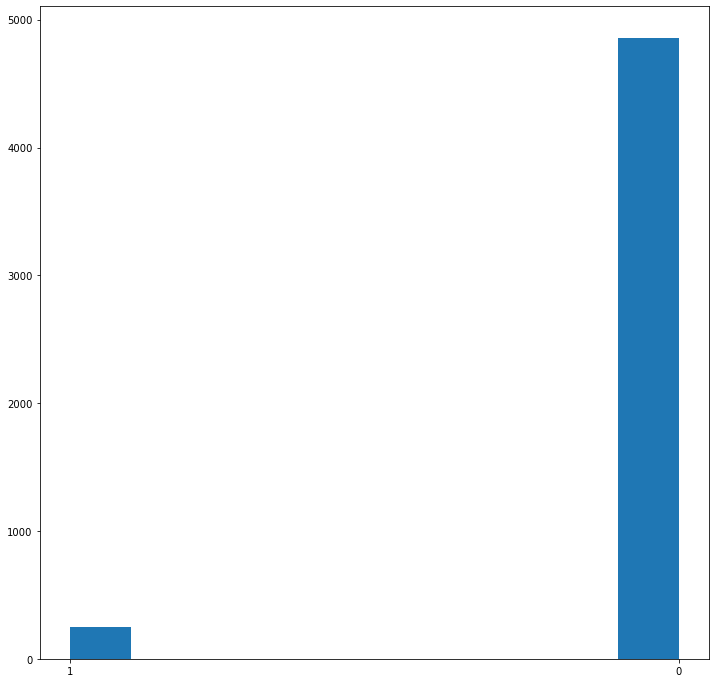

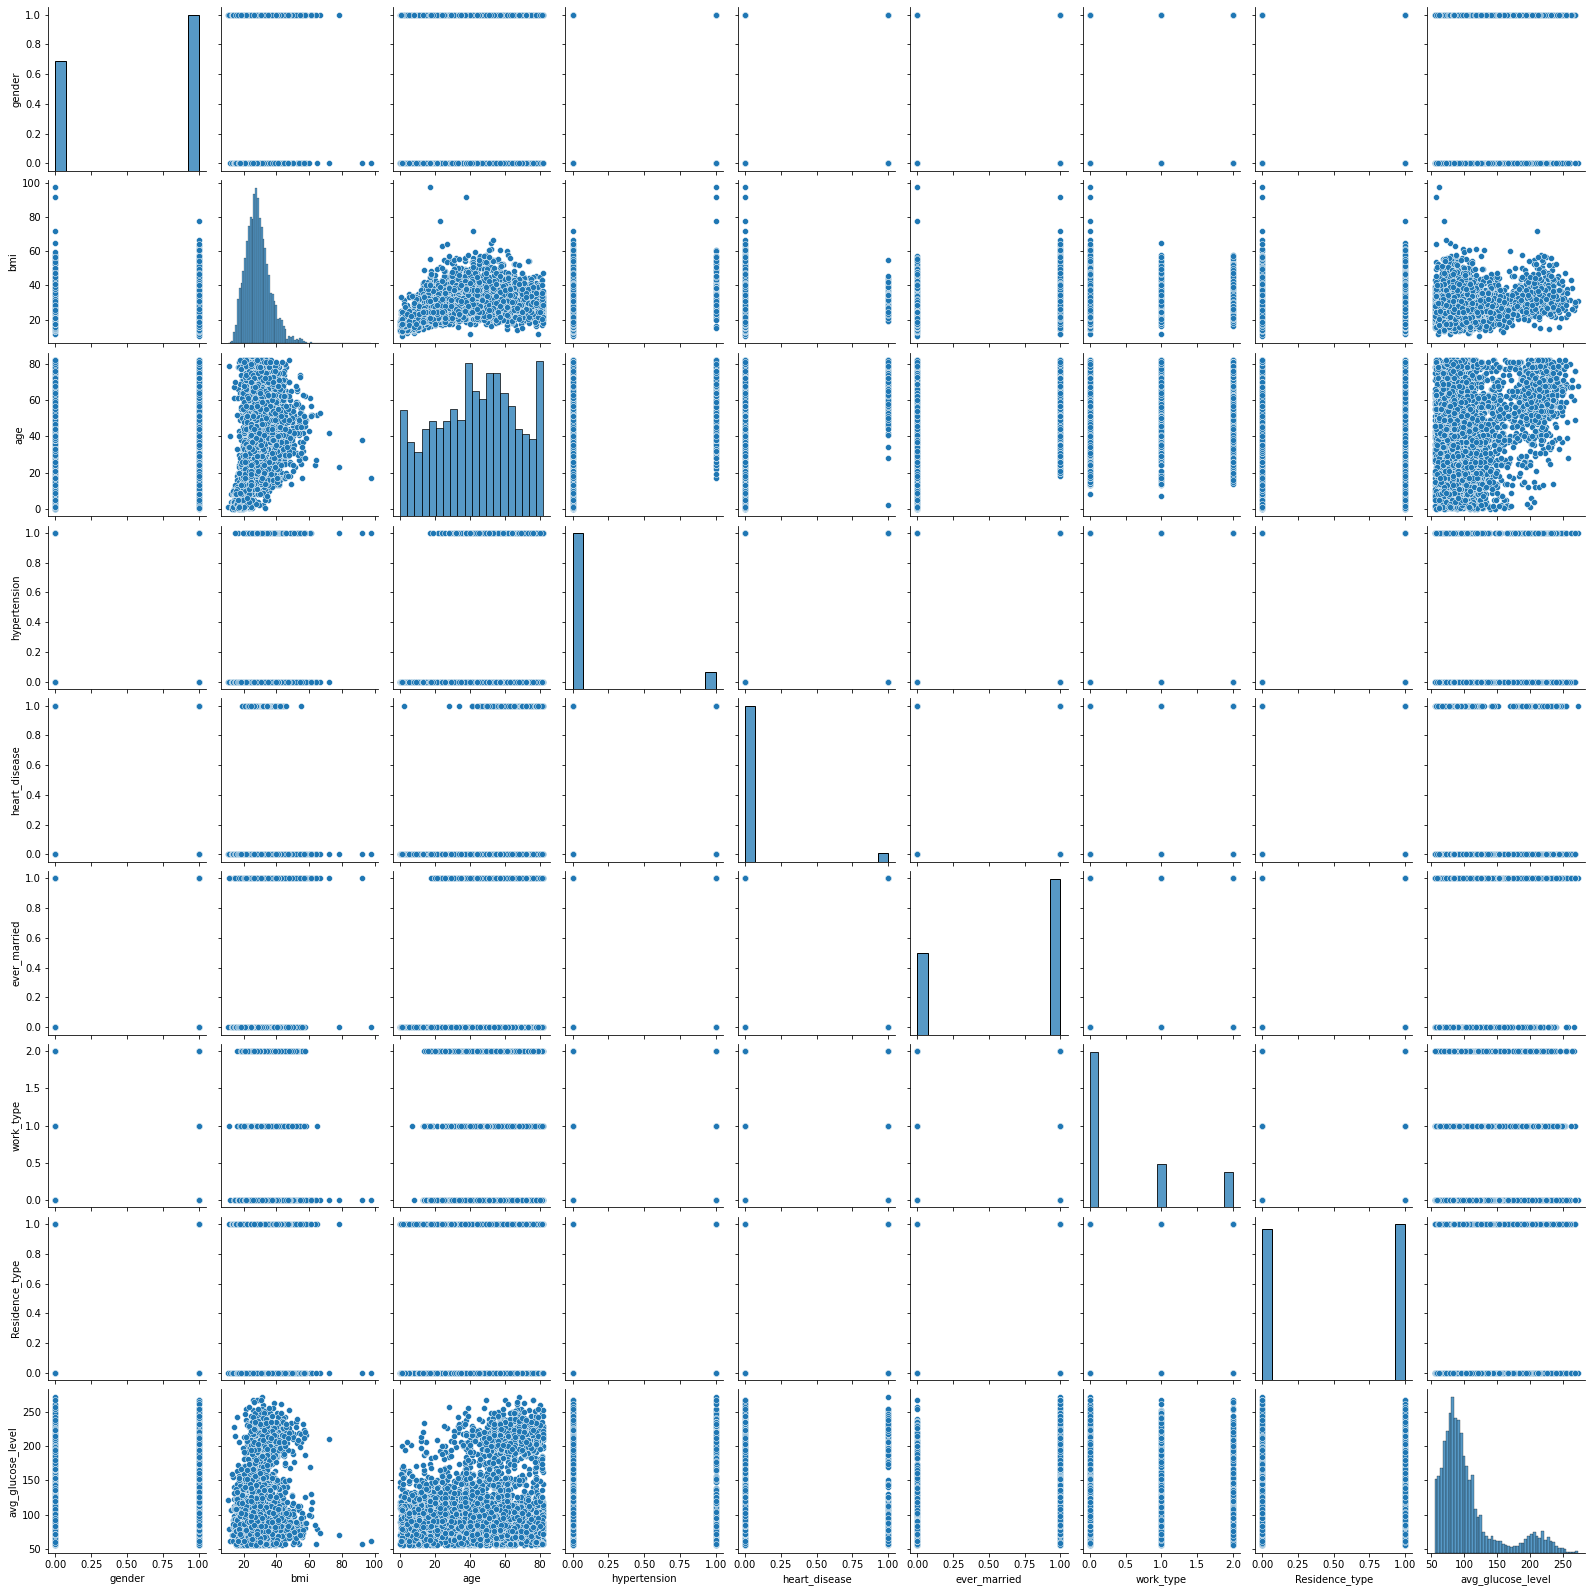

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats


folderPath="~/Desktop/Assignment2/"


#Retrieving Dataset
sData=pd.read_csv('/'.join([folderPath, 'healthcare-dataset-stroke-data.csv']), usecols=list(range(1, 12)))

#generating 10% of dataset:

sDataTen = sData.sample(frac =.10)
 
#converting to useable data types    
    
sData['gender']=sData['gender'].replace({"Male":0,  "Female":1})
sData['ever_married']=sData['ever_married'].replace({"Yes":1,  "No":0})
sData['work_type']=sData['work_type'].replace({"Private":0,  "Self-employed":1, "Govt_job":2})
sData['Residence_type']=sData['Residence_type'].replace({"Urban":1,  "Rural":0})
sData['smoking_status']=sData['smoking_status'].replace({"formerly smoked":0,  "smokes":1, "never smoked":2, "Unknown": 3})
sData['gender'] = sData['gender'].apply(pd.to_numeric, errors='coerce')
sData['work_type'] = sData['work_type'].apply(pd.to_numeric, errors='coerce')

sDataTen['gender']=sDataTen['gender'].replace({"Male":0,  "Female":1})
sDataTen['ever_married']=sDataTen['ever_married'].replace({"Yes":1,  "No":0})
sDataTen['work_type']=sDataTen['work_type'].replace({"Private":0,  "Self-employed":1, "Govt_job":2})
sDataTen['Residence_type']=sDataTen['Residence_type'].replace({"Urban":1,  "Rural":0})
sDataTen['smoking_status']=sDataTen['smoking_status'].replace({"formerly smoked":0,  "smokes":1, "never smoked":2, "Unknown": 3})
sDataTen['gender'] = sDataTen['gender'].apply(pd.to_numeric, errors='coerce')
sDataTen['work_type'] = sDataTen['work_type'].apply(pd.to_numeric, errors='coerce')


#Distribution of Target Variable

fig, axes = plt.subplots(1,1,sharex=True, sharey=True, figsize=(12, 12))

axes.hist(sData['stroke'].astype(str))
plt.show()

## How inputs are related

cols = ['gender', 'bmi', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level']

sns.pairplot(sData[cols])



The target variable for the data is whether or not the subject has had a stroke. The distribution as a result lies between 0 and 1, and in the case majority of the population has not had a stroke

When relating all the variables amongst themselves one finds that some obeservations are more observable than others. This is due to the fact that there is a large population base therefore observations made on the graphs above are difficult to make. In some graphs however it is clear to observe the variable connections, for example heart disease seems to increase in frequency with an increase in age. 

No variables were dropped except for index id. All variables are likely important or somewhat significant in predicting the likelihood of having a stroke. 



Part 2 - Statistical Learning



In [2]:
# Model 1 - Regress stroke based on age, bmi, glucose levels

results = smf.ols('stroke ~ age + bmi + avg_glucose_level', data=sData).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     111.1
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           1.27e-69
Time:                        15:37:33   Log-Likelihood:                 1050.2
No. Observations:                4909   AIC:                            -2092.
Df Residuals:                    4905   BIC:                            -2067.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0526      0.01

In [3]:
#Model 2 - Regress stroke based on hypertension and heart disease

results = smf.ols('stroke ~ hypertension + heart_disease', data=sData).fit()

print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     82.21
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           7.27e-36
Time:                        15:37:33   Log-Likelihood:                 677.75
No. Observations:                5110   AIC:                            -1350.
Df Residuals:                    5107   BIC:                            -1330.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0343      0.003     10.792

In [4]:
#Model 3 - Regress Stroke on Smoking status 

results = smf.ols('stroke ~ smoking_status', data=sData).fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     27.98
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           1.28e-07
Time:                        15:37:33   Log-Likelihood:                 610.75
No. Observations:                5110   AIC:                            -1218.
Df Residuals:                    5108   BIC:                            -1204.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0759      0.006     12.

In [5]:
#Model 4 - Regress Stroke on Marriage Status, occupancy and Residence Type

results = smf.ols('stroke ~ ever_married + work_type + Residence_type', data=sData).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     8.464
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           1.32e-05
Time:                        15:37:33   Log-Likelihood:                 232.90
No. Observations:                4401   AIC:                            -457.8
Df Residuals:                    4397   BIC:                            -432.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0214      0.008      2.

In [6]:
#Model 5 - Regress Stroke on bmi, hypertension, age and bmi*avg_glucose_level

results = smf.ols('stroke ~ bmi + hypertension + age + avg_glucose_level + bmi*avg_glucose_level', data=sData).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     73.95
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           6.71e-75
Time:                        15:37:33   Log-Likelihood:                 1067.3
No. Observations:                4909   AIC:                            -2123.
Df Residuals:                    4903   BIC:                            -2084.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.01

Of the models above, The greatest R^2 value of the models is found in model 5. One of the reasons for a relatively low R^2 value for all the data points is because the chosen separation of input values. What I mean by this is that as one increase the number of variables taken into account, the R^2 value seems to also rise. But of the models above I've chosen clusters of input variables which seem to relate to each other; such as bmi and average glucose levels.

The P-Value holds statistical significants (below 0.05) in some of the models above. An example is Bmi*avg_glucose_level has a p value of 0.039.

Part 3 - Subset Selection

In [7]:
from itertools import permutations


# initiate empty list to store R2
R2= 0
best_predictor="none"
sData = sData.dropna()

X=sData.loc[:,~sData.columns.str.contains('stroke')]
y=sData.loc[:,sData.columns.str.contains('stroke')]

DFs=[]
#for p in range(X.shape[1]): # uncomment here if you want to do it for all RUN AT YOUR OWN RISK
for p in reversed(range(9)):
    R2=0
    best_predictor="none"
    R2_list=[]; adj_R2_list=[] ; aic=[] ; bic=[] ; models=[]
    for k in permutations(list(range(X.shape[1]-1)), p):
        model=list(k)
        model.append(-1)
        results = sm.OLS(y.astype(float), X.iloc[:,model]).fit() # fit predictors from model
        # append statistics to list
        R2_list.append(results.rsquared) ; adj_R2_list.append(results.rsquared_adj) 
        aic.append(results.aic); bic.append(results.bic) ; models.append(','.join(X.columns[model]))

        if results.rsquared_adj>R2:
            model.pop(-1)
            R2=results.rsquared_adj 
    DFs.append(pd.DataFrame(data={'R2':R2_list,'Adjusted R2':adj_R2_list, "AIC":aic, "BIC":bic,'Predictors':p,'model':models}))
    
    print("Best predictor for M{} is: {} with {}.".format(p,', '.join(X.columns[model]),round(R2,3)))
    
dd=pd.concat(DFs)
dd.head()

dd_best=dd.groupby(['Predictors']).agg({"R2":np.max, "Adjusted R2":np.max, "AIC":np.min, "BIC":np.min}).reset_index()
dd_best

Best predictor for M8 is: bmi, avg_glucose_level, Residence_type, work_type, ever_married, heart_disease, hypertension, age, smoking_status with 0.116.
Best predictor for M7 is: bmi, avg_glucose_level, Residence_type, work_type, ever_married, heart_disease, hypertension, smoking_status with 0.116.
Best predictor for M6 is: bmi, avg_glucose_level, Residence_type, work_type, ever_married, heart_disease, smoking_status with 0.115.
Best predictor for M5 is: bmi, avg_glucose_level, Residence_type, work_type, ever_married, smoking_status with 0.113.
Best predictor for M4 is: bmi, avg_glucose_level, Residence_type, work_type, smoking_status with 0.11.
Best predictor for M3 is: bmi, avg_glucose_level, Residence_type, smoking_status with 0.105.
Best predictor for M2 is: bmi, avg_glucose_level, smoking_status with 0.099.
Best predictor for M1 is: bmi, smoking_status with 0.092.
Best predictor for M0 is:  with 0.026.


,Predictors,R2,Adjusted R2,AIC,BIC
0,0,0.025900,0.025669,-829.328290,-822.981885
1,1,0.092592,0.092161,-1126.264286,-1113.571476
2,2,0.099361,0.098720,-1155.825087,-1136.785873
3,3,0.106215,0.105366,-1186.023385,-1160.637765
4,4,0.111012,0.109957,-1206.709422,-1174.977398
5,5,0.114303,0.113041,-1220.341666,-1182.263236
6,6,0.116681,0.115212,-1229.672630,-1185.247796
7,7,0.117636,0.115958,-1232.232301,-1181.461062
8,8,0.117712,0.115824,-1230.595260,-1173.477617


Calculating MSE:

In [8]:
# Best number of predictors using Cross Validation
# use best model from precedent exercise to speed up the code
import sklearn.linear_model as skl_lm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

models=["intercept",["bmi","smoking_status"], 
        ["bmi","avg_glucose_level","smoking_status"],
        ["bmi","avg_glucose_level","smoking_status","Residence_type"],
        ["bmi","avg_glucose_level","smoking_status","Residence_type","intercept"],
        ["bmi","avg_glucose_level","smoking_status","Residence_type","work_type","intercept"],
        ["bmi","avg_glucose_level","smoking_status","Residence_type","work_type","ever_married","intercept"],
        ["bmi","avg_glucose_level","smoking_status","Residence_type","work_type","ever_married","heart_disease","intercept"],
        ["bmi","avg_glucose_level","smoking_status","Residence_type","work_type","ever_married","heart_disease","hypertension","intercept"]]

sData['intercept']=1
kfold=5
DFs=[]
kf = KFold(n_splits=kfold, random_state=1706, shuffle=True)

for i,m in enumerate(models):
    MSEs=[] # empty list of MSE scores
    X=sData[m].values
    y=sData['stroke'].values
    for train_index, test_index in kf.split(X):
        if i==0:
            X_train, X_test = X[train_index].reshape(-1, 1), X[test_index].reshape(-1, 1)
        else:
            X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # regression
        reg = LinearRegression() # initiate the regression class
        reg.fit(X_train,y_train) # fit the data
        # Out of Sample MSE:
        mse=mean_squared_error(y_test, reg.predict(X_test))
        MSEs.append(mse)
    DFs.append(pd.DataFrame({'Predictors':i,'MSE':MSEs}))
    
MSE_scores=pd.concat(DFs)
mse=MSE_scores.groupby('Predictors').mean().reset_index()    
mse

,Predictors,MSE
0,0,0.046931
1,1,0.046818
2,2,0.046046
3,3,0.046061
4,4,0.046061
5,5,0.046076
6,6,0.045940
7,7,0.045455
8,8,0.045025


Observing the results above the BIC with the smallest value is found in model 6. And the MSE with the smallest value is found in model 7. Therefore the 2 indicators do not point to the equivalent model. That being said MSE is usually taken over other indicators.

Part 4 - Advanced Statistical Learning

In [9]:
#Using a Rdige Regression

# import the preprocessing module from sklearn
from sklearn import preprocessing
X_train =sData[['stroke','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train.mean(axis=0) , X_train.std(axis=0)

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

lambdas = 10**np.linspace(10,-2,100)*0.5
ridge = Ridge()
coefs = []

for 𝜆 in lambdas:
    ridge.set_params(alpha=𝜆)
    ridge.fit(X_train, y)
    coefs.append(ridge.coef_)
ridge_results=pd.DataFrame(coefs,columns=['stroke','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status'])
ridge_results['Lambda']=lambdas  
ridge_results=pd.melt(ridge_results,id_vars=['Lambda'], var_name='Beta', value_name='Estimate')
ridge_results.head()                        




,Lambda,Beta,Estimate
0,5.000000e+09,stroke,1.825875e-07
1,3.782317e+09,stroke,2.413698e-07
2,2.861184e+09,stroke,3.190765e-07
3,2.164381e+09,stroke,4.218002e-07
4,1.637275e+09,stroke,5.575946e-07


In the above section we used the Ridge regression method and below is the cross validation of the model

In [10]:
clf = RidgeCV(alphas=[5.0e+09,3.7e+09 ,2.8e+09 ,2.1e+09 ,1.6e+09]).fit(X, y)
clf.score(X, y)

0.00020957441650182318

Part 5 - Prediction 

In [11]:
#10% dataset
# initiate empty list to store R2
#dropping NANS
sDataTen = sDataTen.dropna()



models=["intercept",["bmi","smoking_status"], 
        ["bmi","avg_glucose_level","smoking_status"],
        ["bmi","avg_glucose_level","smoking_status","Residence_type"],
        ["bmi","avg_glucose_level","smoking_status","Residence_type","intercept"],
        ["bmi","avg_glucose_level","smoking_status","Residence_type","work_type","intercept"],
        ["bmi","avg_glucose_level","smoking_status","Residence_type","work_type","ever_married","intercept"],
        ["bmi","avg_glucose_level","smoking_status","Residence_type","work_type","ever_married","heart_disease","intercept"],
        ["bmi","avg_glucose_level","smoking_status","Residence_type","work_type","ever_married","heart_disease","hypertension","intercept"]]

sDataTen['intercept']=1
kfold=5
DFs=[]
kf = KFold(n_splits=kfold, random_state=1706, shuffle=True)

for i,m in enumerate(models):
    MSEs=[] # empty list of MSE scores
    X=sDataTen[m].values
    y=sDataTen['stroke'].values
    for train_index, test_index in kf.split(X):
        if i==0:
            X_train, X_test = X[train_index].reshape(-1, 1), X[test_index].reshape(-1, 1)
        else:
            X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # regression
        reg = LinearRegression() # initiate the regression class
        reg.fit(X_train,y_train) # fit the data
        # Out of Sample MSE:
        mse=mean_squared_error(y_test, reg.predict(X_test))
        MSEs.append(mse)
    DFs.append(pd.DataFrame({'Predictors':i,'MSE':MSEs}))
    
MSE_scores=pd.concat(DFs)
mse=MSE_scores.groupby('Predictors').mean().reset_index()    
mse




,Predictors,MSE
0,0,0.037274
1,1,0.037178
2,2,0.037347
3,3,0.037850
4,4,0.037850
5,5,0.038690
6,6,0.038796
7,7,0.038603
8,8,0.039859


Conclusion

    I found it difficult to predict the Y variable (stroke). One of the reasons why this may be is because when one observes the distribution variable data above on 'stroke', one notices that the population of people surveyed who actually experienced a stroke is dismal compared to those who hadn't. In other words out of a population of over 5000 participants, only 250 people reported having a stroke. This isn't good from predictive purposes because of a largely varying dataset a disproprtionate amount of individuals did not experience strokes. In other words, may people have high bmis, and high glucose levels, or are married, but that doesn't necessarily mean they tested positive for having a stroke. Maybe if the dataset included a greater number of individuals who experienced a stroke and their subsequent input values, the data would produce higher quality predictability.

    That being said, as the number of predictors increased the predictability of the dataset increased. An example of  this is found in the best OLS method (model 8) determined through permutations through modeks. The R^2 here was 0.112. This, in reality, is likely very low. In part 2 when chosing the best OLS model, the use of an interaction variable also increased my Y predictability.  That being said the non - OLS model was not as effective as predicting Y, with a cross validation on the Ridge Regression of only 0.000209. All in all using permutations to can various models with various predictors proved most reliable. 